In [16]:
import pandas as pd
import json
import networkx
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

# Twitter's tourism analysis with tweets related to AirBNB
#  A study based on Ecuadorian cities

##### In this study we extracted about 10000 tweets with the library GetOldTweets3
##### Those tweets were extracted based on the terms it contained: (AirBnB, Hospedaje, Hotel)

In [21]:
list_airbnb = glob.glob(('*airbnb*.csv'))
list_hospedaje = glob.glob(('*hospedaje*.csv'))
list_hotel = glob.glob(('*hotel*.csv'))

In [27]:
def get_df(list_df):
    data_df = pd.DataFrame()
    for i in list_df:
        df = pd.read_csv(i,header=None)
        data_df = data_df.append(df)
    return data_df

In [67]:
airbnb_df = get_df(list_airbnb)
hospedaje_df = get_df(list_hospedaje)
hotel_df = get_df(list_hotel)

In [60]:
hotel_df

,0,1,2,3,4,5,6,7
0,1160184816060514305,chefjuanboada,Día 2 en Hotel Castellmar https://www.instagra...,2019-08-10 13:43:09+00:00,0,0,NaN,Atacames
1,1159839684081491969,HotelCARLUZ,Llego el fin de semana y te proponemos algunas...,2019-08-09 14:51:44+00:00,0,0,NaN,Atacames
2,1157821700341239808,oscarmera_1,#amigos procesos de formación #friends #esmera...,2019-08-04 01:12:59+00:00,3,1,#amigos #friends #esmeraldas #feriado2019 #ins...,Atacames
3,1157462434388566018,HotelElCisne1y2,Nuestros Queridos Turistas Felices De Conocer ...,2019-08-03 01:25:23+00:00,1,0,NaN,Atacames
4,1157361204681224195,HotelCARLUZ,!!! Simplemente !!! pic.twitter.com/LH21VSlJyT,2019-08-02 18:43:08+00:00,0,0,NaN,Atacames
5,1147512328621088768,chefestebantv,Como estar en casita #ElEquipo de grandpacific...,2019-07-06 14:27:13+00:00,1,0,#ElEquipo #comodidad #BuenaAtención #Tonsupa #...,Atacames
6,1144601255253303296,ChrisgLDU,Cabañas #OASIS lo mejor en hospedaje en estas ...,2019-06-28 13:39:39+00:00,0,0,#OASIS #Vacaciones #Súa #Esmeraldas #Hotel #Ec...,Atacames
7,1138627251824680961,JATC7,#feliz de estar a tu lado estos #19meses #team...,2019-06-12 02:01:06+00:00,0,0,#feliz #19meses #teamo #novios #enfermeros,Atacames
8,1132441494315520000,jemf2001,Amigo fiel en Hotel Puerto Ballesta https://ww...,2019-05-26 00:21:06+00:00,0,0,NaN,Atacames
9,1132030684409794566,casasyfincas18,Gran Oportunidad de Inversión Prestigioso Hote...,2019-05-24 21:08:41+00:00,0,0,#Esmeraldas,Atacames


In [71]:
hotel_df[3] = pd.to_datetime(hotel_df[3])

In [74]:
hospedaje_df[3] = pd.to_datetime(hospedaje_df[3])

In [75]:
airbnb_df[3] = pd.to_datetime(airbnb_df[3])

# Sentiment Analysis on tweets

### In this part a column indicating the sentiment for the tweet is going to be added
###### source: https://unipython.com/analisis-de-sentimientos-con-textblob-y-vader/

In [84]:
import indicoio
indicoio.config.api_key = '887baf36777da97f48fc3fb6b18586d7'

In [85]:
indicoio.sentiment("me gusta escribir")

0.8108972583078679

In [92]:
hotel_df['sentiment'] = hotel_df[2].apply(lambda x: indicoio.sentiment(x) )
hotel_df

,0,1,2,3,4,5,6,7,sentiment
0,1160184816060514305,chefjuanboada,Día 2 en Hotel Castellmar https://www.instagra...,2019-08-10 13:43:09+00:00,0,0,NaN,Atacames,0.802902
1,1159839684081491969,HotelCARLUZ,Llego el fin de semana y te proponemos algunas...,2019-08-09 14:51:44+00:00,0,0,NaN,Atacames,0.688678
2,1157821700341239808,oscarmera_1,#amigos procesos de formación #friends #esmera...,2019-08-04 01:12:59+00:00,3,1,#amigos #friends #esmeraldas #feriado2019 #ins...,Atacames,0.149371
3,1157462434388566018,HotelElCisne1y2,Nuestros Queridos Turistas Felices De Conocer ...,2019-08-03 01:25:23+00:00,1,0,NaN,Atacames,0.990453
4,1157361204681224195,HotelCARLUZ,!!! Simplemente !!! pic.twitter.com/LH21VSlJyT,2019-08-02 18:43:08+00:00,0,0,NaN,Atacames,0.629843
5,1147512328621088768,chefestebantv,Como estar en casita #ElEquipo de grandpacific...,2019-07-06 14:27:13+00:00,1,0,#ElEquipo #comodidad #BuenaAtención #Tonsupa #...,Atacames,0.270663
6,1144601255253303296,ChrisgLDU,Cabañas #OASIS lo mejor en hospedaje en estas ...,2019-06-28 13:39:39+00:00,0,0,#OASIS #Vacaciones #Súa #Esmeraldas #Hotel #Ec...,Atacames,0.971222
7,1138627251824680961,JATC7,#feliz de estar a tu lado estos #19meses #team...,2019-06-12 02:01:06+00:00,0,0,#feliz #19meses #teamo #novios #enfermeros,Atacames,0.865356
8,1132441494315520000,jemf2001,Amigo fiel en Hotel Puerto Ballesta https://ww...,2019-05-26 00:21:06+00:00,0,0,NaN,Atacames,0.574431
9,1132030684409794566,casasyfincas18,Gran Oportunidad de Inversión Prestigioso Hote...,2019-05-24 21:08:41+00:00,0,0,#Esmeraldas,Atacames,0.938443


In [94]:
hospedaje_df['sentiment'] = hospedaje_df[2].apply(lambda x: indicoio.sentiment(x) )
hospedaje_df

,0,1,2,3,4,5,6,7,sentiment
0,1160185098916040704,carturoleon,Te faltó decir viajar 6 8 12 horas por tierra ...,2019-08-10 13:44:17+00:00,1,0,NaN,Gualaquiza,0.879095
1,1143526470935109632,riverpeopleraft,Ven y disfruta de conocer la Amazonía con Rive...,2019-06-25 14:28:51+00:00,0,0,NaN,Tena,0.151790
2,1159506853354758144,HeneciaEcuador,Buen día Henecias! Si alguien que viaja a Perú...,2019-08-08 16:49:11+00:00,14,5,NaN,El Chaco,0.722887
3,1159446378160017411,KattyMejia11,@Airbnb necesito asesoramiento para mecanismo ...,2019-08-08 12:48:52+00:00,0,0,NaN,El Chaco,0.571598
4,1159168036756230144,ABRELATAM,En estos últimos días los donantes que se han ...,2019-08-07 18:22:50+00:00,0,0,NaN,El Chaco,0.886135
5,1159126530125107205,ARCSA_CZ9,#ArcsaTeInforma | Precautelamos la salud de lo...,2019-08-07 15:37:54+00:00,10,16,#ArcsaTeInforma #Quito #ArcsaTeCuidapic,El Chaco,0.850544
6,1158532053840912385,Dianaraquel25ec,Vacaciones en Loja.. que hermoso salir de la c...,2019-08-06 00:15:40+00:00,0,0,NaN,El Chaco,0.748974
7,1158496166801223680,CarlosLbanderas,Y cómo es tu hospedaje cuando cae la noche. Ti...,2019-08-05 21:53:04+00:00,0,0,NaN,El Chaco,0.813003
8,1156733029890609157,CatShantal,Estuvimos con Preciosa en Pluking disfrutando ...,2019-08-01 01:07:00+00:00,0,0,#hospedaje #ShihTzu #Veterinaria #ShantalTheCa...,El Chaco,0.430698
9,1146944732477710336,jcrpFOTOGRAMA,Presentamos el hospedaje oficial de La Travesí...,2019-07-05 00:51:48+00:00,1,0,NaN,El Chaco,0.528340


In [95]:
airbnb_df['sentiment'] = airbnb_df[2].apply(lambda x: indicoio.sentiment(x) )
airbnb_df

,0,1,2,3,4,5,6,7,sentiment
0,1160150293818089472,florencia3g,El tema del reportaje era hablar de la gentrif...,2019-08-10 11:25:59+00:00,5,0,NaN,San Cristobal,0.630286
1,1160047591926591488,Lakatus,¿Has probado Airbnb? Regístrate a través de mi...,2019-08-10 04:37:53+00:00,0,0,NaN,San Cristobal,0.934657
2,1159936574781452288,elsuperidolo,@SantanderMx buenas tardes si hago un pago con...,2019-08-09 21:16:44+00:00,0,0,NaN,San Cristobal,0.518644
3,1159936130180980736,elsuperidolo,Entonces si se considera como compra en el ext...,2019-08-09 21:14:58+00:00,0,0,NaN,San Cristobal,0.428252
4,1159934098749583360,elsuperidolo,@airbnb_mx una duda al hacer el pago del Airbn...,2019-08-09 21:06:54+00:00,0,0,NaN,San Cristobal,0.560564
5,1159919631039176705,APT_mx,En APT también se vive una experiencia Airbnb....,2019-08-09 20:09:24+00:00,3,2,#ExperienciaSolidaria #HéroesContraelHambrepic,San Cristobal,0.977864
6,1159892443720032256,jbalderramar,Se acaba de abrir la vacante de Policy Associa...,2019-08-09 18:21:22+00:00,1,0,NaN,San Cristobal,0.757843
7,1159676066060853248,mquinza,Olvida las comisiones bancarias: Morena va aho...,2019-08-09 04:01:34+00:00,0,0,NaN,San Cristobal,0.464845
8,1159572518753185792,isaaclcolorado,Alguien aquí ha tomado alguna “experiencia” co...,2019-08-08 21:10:06+00:00,7,0,NaN,San Cristobal,0.797770
9,1159559169113858048,JRobertoCabral,Trasciende que @ArturoHerrera_G y diputados de...,2019-08-08 20:17:04+00:00,4,1,NaN,San Cristobal,0.232458


# Saving sentiment analysis files

In [98]:
airbnb_df.to_csv(r'airbnb_sens.csv')
hospedaje_df.to_csv(r'hospedaje_sens.csv')
hotel_df.to_csv(r'hotel_sens.csv')

# Reading tweets with sentiment

In [5]:
bnb_sense = pd.read_csv("airbnb_sens.csv", index_col=0)
hos_sense = pd.read_csv("hospedaje_sens.csv", index_col=0)
hot_sense = pd.read_csv("hotel_sens.csv", index_col=0)

,0,1,2,3,4,5,6,7,sentiment
0,1160184816060514305,chefjuanboada,Día 2 en Hotel Castellmar https://www.instagra...,2019-08-10 13:43:09+00:00,0,0,NaN,Atacames,0.802902
1,1159839684081491969,HotelCARLUZ,Llego el fin de semana y te proponemos algunas...,2019-08-09 14:51:44+00:00,0,0,NaN,Atacames,0.688678
2,1157821700341239808,oscarmera_1,#amigos procesos de formación #friends #esmera...,2019-08-04 01:12:59+00:00,3,1,#amigos #friends #esmeraldas #feriado2019 #ins...,Atacames,0.149371
3,1157462434388566018,HotelElCisne1y2,Nuestros Queridos Turistas Felices De Conocer ...,2019-08-03 01:25:23+00:00,1,0,NaN,Atacames,0.990453
4,1157361204681224195,HotelCARLUZ,!!! Simplemente !!! pic.twitter.com/LH21VSlJyT,2019-08-02 18:43:08+00:00,0,0,NaN,Atacames,0.629843
5,1147512328621088768,chefestebantv,Como estar en casita #ElEquipo de grandpacific...,2019-07-06 14:27:13+00:00,1,0,#ElEquipo #comodidad #BuenaAtención #Tonsupa #...,Atacames,0.270663
6,1144601255253303296,ChrisgLDU,Cabañas #OASIS lo mejor en hospedaje en estas ...,2019-06-28 13:39:39+00:00,0,0,#OASIS #Vacaciones #Súa #Esmeraldas #Hotel #Ec...,Atacames,0.971222
7,1138627251824680961,JATC7,#feliz de estar a tu lado estos #19meses #team...,2019-06-12 02:01:06+00:00,0,0,#feliz #19meses #teamo #novios #enfermeros,Atacames,0.865356
8,1132441494315520000,jemf2001,Amigo fiel en Hotel Puerto Ballesta https://ww...,2019-05-26 00:21:06+00:00,0,0,NaN,Atacames,0.574431
9,1132030684409794566,casasyfincas18,Gran Oportunidad de Inversión Prestigioso Hote...,2019-05-24 21:08:41+00:00,0,0,#Esmeraldas,Atacames,0.938443


# Hotel, AirBNB and Hospedaje related tweets, sentiments on Ecuador

In [12]:
#bnb_sense.rename(columns={'0':'id', '1':'user','2':'tweet','3':'date','4': "retweets","5":"reactions","6":"hashtags",
#                          '7':'city'}, inplace=True)
#hot_sense.rename(columns={'0':'id', '1':'user','2':'tweet','3':'date','4': "retweets","5":"reactions","6":"hashtags",
#                          '7':'city'}, inplace=True)
#hos_sense.rename(columns={'0':'id', '1':'user','2':'tweet','3':'date','4': "retweets","5":"reactions","6":"hashtags",
#                          '7':'city'}, inplace=True)

In [21]:
hotel_cities = hot_sense[["retweets","reactions","sentiment"]].groupby(hot_sense["city"]).mean()
bnb_cities = bnb_sense[["retweets","reactions","sentiment"]].groupby(bnb_sense["city"]).mean()
hos_cities = hos_sense[["retweets","reactions","sentiment"]].groupby(hos_sense["city"]).mean()

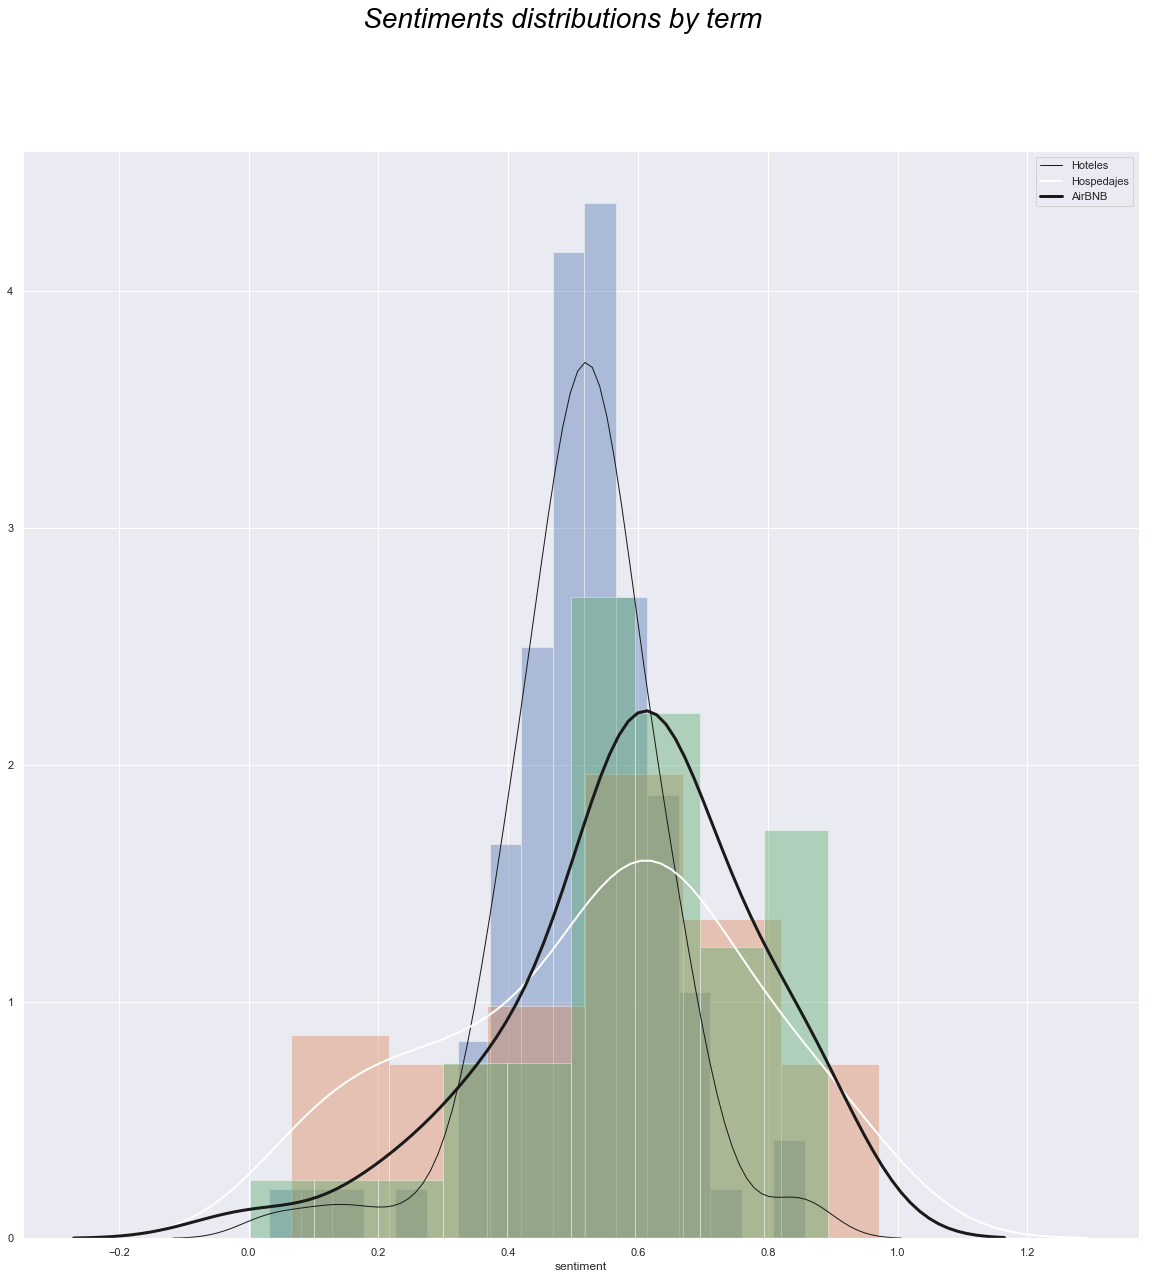

In [49]:
sns.set(rc={'figure.figsize':(20,20)})

fig, axes = plt.subplots(nrows=1, ncols=1)
plt.suptitle("Sentiments distributions by term", fontsize=28, fontweight=0, color='black', style='italic')

sns.distplot(hotel_cities["sentiment"],kde_kws={"color": "k","lw": 1, "label": "Hoteles" })
sns.distplot(hos_cities["sentiment"],kde_kws={"color": "w", "lw": 2, "label": "Hospedajes" })
sns.distplot(bnb_cities["sentiment"],kde_kws={"color": "k", "lw": 3, "label": "AirBNB" })

# Cities with better sentiment on tweets

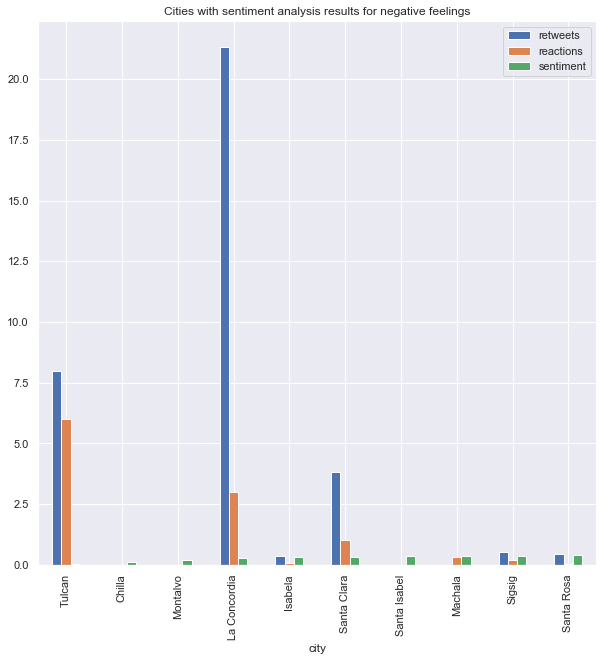

In [47]:
hotel_down = hotel_cities.sort_values('sentiment',ascending = True).head(10)
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(rc={'figure.figsize':(10,10)})
hotel_down.plot(kind='bar', title="Cities with sentiment analysis results for negative feelings")

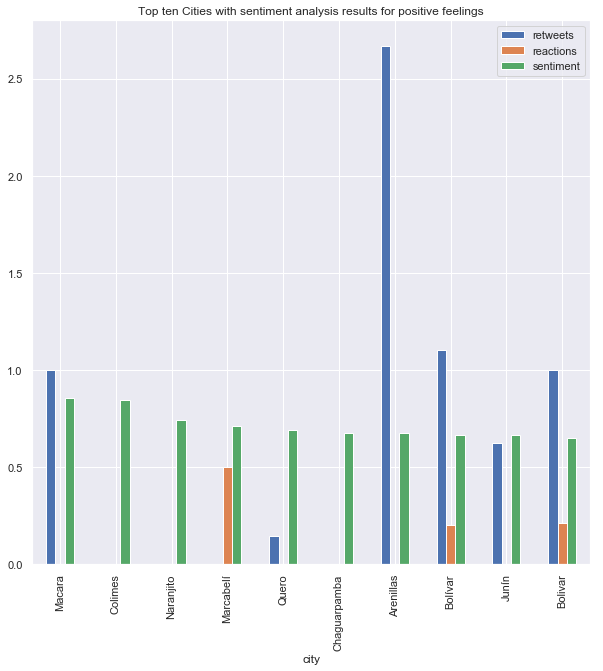

In [48]:
hotel_top = hotel_cities.sort_values('sentiment',ascending = False).head(10)
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(rc={'figure.figsize':(10,10)})
hotel_top.plot(kind='bar', title="Top ten Cities with sentiment analysis results for positive feelings")

# Kendall correlation to get a ranking
#### this is based on the paper: Social Media Data Analytics for Tourism A Preliminary Study
@inproceedings{Dhiratara2016SocialMD,
  title={Social Media Data Analytics for Tourism - A Preliminary Study},
  author={Arkka Dhiratara and Jie Yang and Alessandro Bozzon and Geert-Jan Houben},
  booktitle={KDWeb},
  year={2016}
}

### in this extract : "To quantitatively compare the ranking list of touristic locations from different data sources, we used a well-accepted measure of nonparametric rank correlations, namely Kendall’s τ rank correlation, which is based on pair-wise agreements between touristic locations. The result shows that there is no correlation (< 0.1, with p-value > 0.1) between the ranking list of official report and that of social media. Comparing with the ranking from TripAdvisor, we find a moderate correlation between social media and TripAdvisor (= 0.59, p-value = 0.14). We next qualitatively analyze the similarity and dissimilarity among data from different sources, as we will see later."

#### We are gonna use this in order to check if the different checks like retweets and reactions are similar in ranking to sentiments analysis

In [51]:
import scipy.stats as stats

# Correlation between Sentiment analysis and mean of retweets

In [52]:
s = hotel_top['sentiment']
r = hotel_top['retweets']
tau, p_value = stats.kendalltau(s,r )
tau

-0.33855558338467207

In [53]:
p_value

0.19236358878965365

#### we can found here that there is a weak  negative correlation between sentiment of the tweet and the number of retweets

# Correlation between sentiment and reactions of the tweet

In [54]:
s = hotel_top['sentiment']
r = hotel_top['reactions']
tau, p_value = stats.kendalltau(s,r )
tau

-0.3042903097250923

In [55]:
p_value

0.2655347738734384

#### There is a weak negative correlation between sentiments and reactions

# Correlation between Reactions and retweets

In [58]:
s = hotel_top['reactions']
r = hotel_top['retweets']
tau, p_value = stats.kendalltau(s,r )
tau

0.0662266178532522

In [59]:
p_value

0.8174144681273687

##### There is no correlation between reactions and retweets

# WordCloud
#### In this part we are going to first clean the data and only get the important nouns, in order to get the most used terms
###### source: https://medium.com/@shsu14/introduction-to-data-science-custom-twitter-word-clouds-704ec5538f46

In [93]:
import re

In [ ]:
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

# Analysis of Co-occurrence and Networks of Words 
#### In this part is going to be analyzed co-occuring words and the relations between terms is going to be showed
##### source: https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-bigrams-networks-in-python/